In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
import mpld3
import umap
import sklearn
from sklearn.manifold import TSNE

%matplotlib inline 
mpld3.enable_notebook()

def load_data(directory):
    data = []
    for file in os.listdir(directory):
        data.append(np.load(directory+"/"+file))
    data = np.array(data)
    return data

weird_points = [1781, 536, 1145, 533, 1720, 1328, 1156, 722, 904, 360, 124, 842, 1859, 2496, 392, 1038, 947, 2322, 156, 2138, 193, 2140, 572, 1414]
def plot_lc(emedded_mat, title):
    x = emedded_mat[:, 0]
    y = emedded_mat[:, 1]
    fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')
    N = len(x)
    hehe = []
    s = []
    for i in range(N):
        if i in weird_points:
            hehe.append(2)
            s.append(30)
        else:
            hehe.append(0)
            s.append(1)
        
    hehe = np.array(hehe)
    s = np.array(s)
    scatter = ax.scatter(x,
                         y,
                         c=hehe,
                         s=s,
                         alpha=0.3)
    ax.grid(color='white', linestyle='solid')

    ax.set_title(title, size=15)

    labels = ['point {0}'.format(i + 1) for i in range(N)]
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
    mpld3.plugins.connect(fig, tooltip)

In [3]:
kdata = np.load('KeplerSampleFullQ.npy',encoding='bytes')


In [4]:
data = load_data("true_points")
reshaped_data = data.reshape(2500, 784)

0.259721487761
999


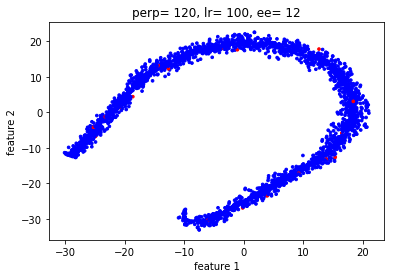

In [17]:
p = 120
ee = 12
lr = 100
model = TSNE(n_components=2, perplexity=p, early_exaggeration=ee, learning_rate=lr)
embeddings = model.fit_transform(reshaped_data)
print model.kl_divergence_
print model.n_iter_
x = embeddings[:, 0]
y = embeddings[:, 1]
colors = ['b' if i not in weird_points else 'r' for i, _ in enumerate(reshaped_data)]
plt.title("perp= " + str(p) + ", lr= " +str(lr) + ", ee= " + str(ee))
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.scatter(x, y, c=colors, s=7)
plt.show()

# FINDING HOW STABLE THIS IS

0.260712206364
999


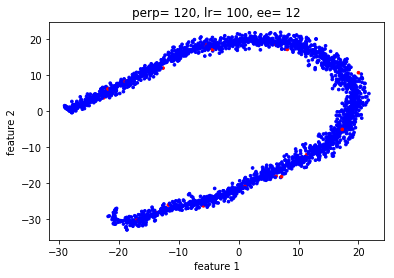

0.259154736996
999


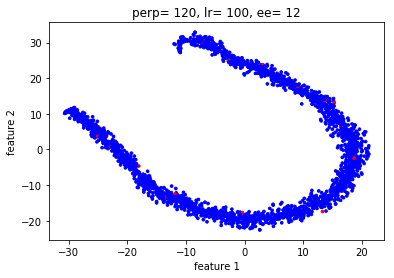

0.260050475597
999


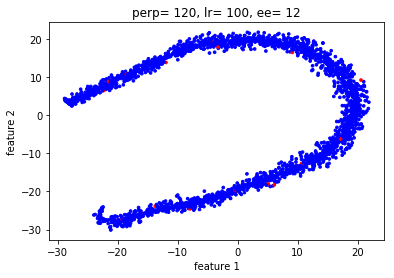

0.260911464691
999


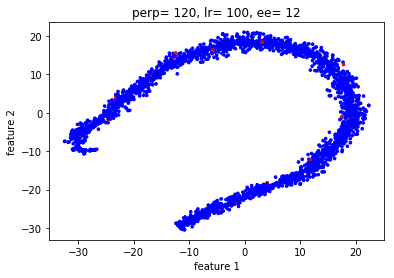

0.263790100813
999


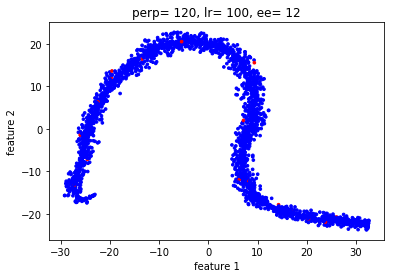

In [22]:
for i in range(5):
    p = 120
    ee = 12
    lr = 100
    model = TSNE(n_components=2, perplexity=p, early_exaggeration=ee, learning_rate=lr)
    embeddings = model.fit_transform(reshaped_data)
    print model.kl_divergence_
    print model.n_iter_
    x = embeddings[:, 0]
    y = embeddings[:, 1]
    colors = ['b' if i not in weird_points else 'r' for i, _ in enumerate(reshaped_data)]
    plt.title("perp= " + str(p) + ", lr= " +str(lr) + ", ee= " + str(ee))
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.scatter(x, y, c=colors, s=7)
    plt.show()

# checking dendogram with stable low LK divergence version

In [23]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage

true_model = TSNE(n_components=2, perplexity=p, early_exaggeration=ee, learning_rate=lr)
embeddings = true_model.fit_transform(reshaped_data)
print true_model.kl_divergence_
print true_model.n_iter_

0.259977340698
999


In [ ]:
z = linkage(reshaped_data, 'ward')
plt.figure(figsize=(200,100))
plt.title('Hierarchical Clustering Dendrogram:')
plt.xlabel('light curve index', fontdict={'size':250})
plt.ylabel('distance', fontdict={'size':250})
dendrogram(
    z,
    leaf_rotation=90.,  # rotates the x axis labels
)
plt.savefig("dendogram/final_dendograms/CHECK_1", format='eps', dpi=1500)

z = linkage(embeddings, 'ward')
plt.figure(figsize=(200,100))
plt.title('Hierarchical Clustering Dendrogram:')
plt.xlabel('light curve index', fontdict={'size':250})
plt.ylabel('distance', fontdict={'size':250})
dendrogram(
    z,
    leaf_rotation=90.,  # rotates the x axis labels
)
plt.savefig("dendogram/final_dendograms/CHECK_2", format='eps', dpi=1500)


In [25]:
z = linkage(embeddings, 'ward')
plt.figure(figsize=(200,100))
plt.title('Hierarchical Clustering Dendrogram:')
plt.xlabel('light curve index', fontdict={'size':250})
plt.ylabel('distance', fontdict={'size':250})
dendrogram(
    z,
    leaf_rotation=90.,  # rotates the x axis labels
)
plt.savefig("dendogram/final_dendograms/CHECK_3", format='eps', dpi=1500)

# weird clustering stuff